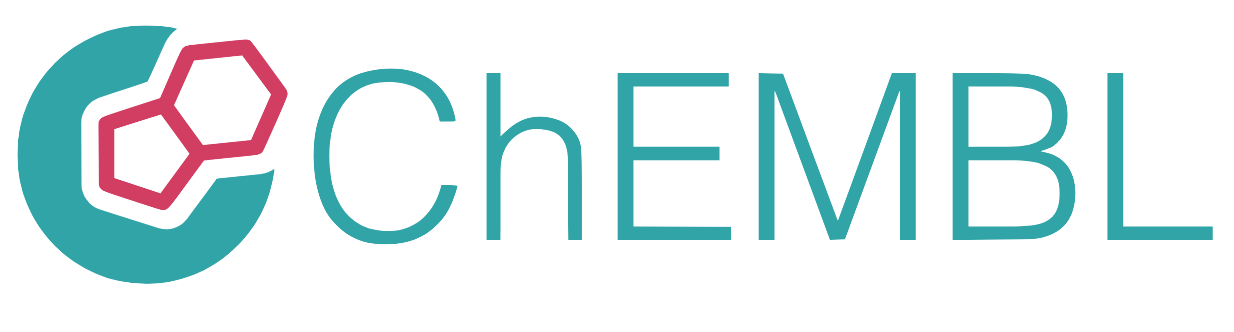

---
**Realizado por:** Raziel Cedillo
**Contacto:** brayanraziel1997@gmail.com
(junio 2023)

---


# **ChEMBL** (*Obtención de datos y ejemplos*)


---



Las siguientes paqueterias y herramientas quimioinformáticas nos ayudan a acceder a los datos de ChEMBL:
*   chembl_webresource_client
*   pandas


Puntos a revisar:
1. Moléculas
2. Fármacos
3. Blancos
4. Actividad
5. Ensayos
6. Tejidos
7. Células
8. Utilidades
9. Ejercicio global.

Para realizar una búsqueda sólo necesitamos tres cosas: 1) responder a la pregunta ¿qué quiero conocer?, 2) el **recurso disponible a emplear** y 3) la **palabra clave** que nos permitirá aplicar un filtro, opcionalmente se pueden aplicar filtros adicionales.

---

# **Paqueterias**: instalación e importación
---


In [ ]:
from IPython.utils import io
import tqdm.notebook
import os, os.path, sys, random, subprocess
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
        pbar.update(20)
        !pip install matplotlib, seaborn, pandas
        #Librerías gráficas
        import matplotlib.pyplot as plt
        from IPython.display import SVG
        import seaborn as sns
        pbar.update(40)
        #Librerias de herramientas primarias:
        import pandas as pd
        %config Completer.use_jedi = False
        import json
        pbar.update(30)
        #Busqueda en ChEMBL (API)
        !pip install chembl_webresource_client
        from chembl_webresource_client.new_client import new_client #Importar API
        from chembl_webresource_client.utils import utils
        from tqdm.auto import tqdm
        from pathlib import Path
        # Montar unidad de Google Drive
        from google.colab import drive
        drive.mount("/content/drive")
        pbar.update(10)

  0%|          | 0/100 [00:00<?, ?it/s]

---

# **Ejemplo y estructura de una búsqueda general.**
---


En la siguiente figura se ejemplifica visualmente una búsqueda a través de la interfaz gráfica de ChEMBL (lado izquierdo) en comparación con una realizada a través de la API (lado derecho).

En la primera sección de ambas metodologías se realiza la búsqueda de la palabra "aspirina" ("aspirin", subrayado en rosa).
En la segunda sección, se realiza la búsqueda de un identificador de ChEMBL asociado a la aspirina (CHEMBL25, subrayado en verde).


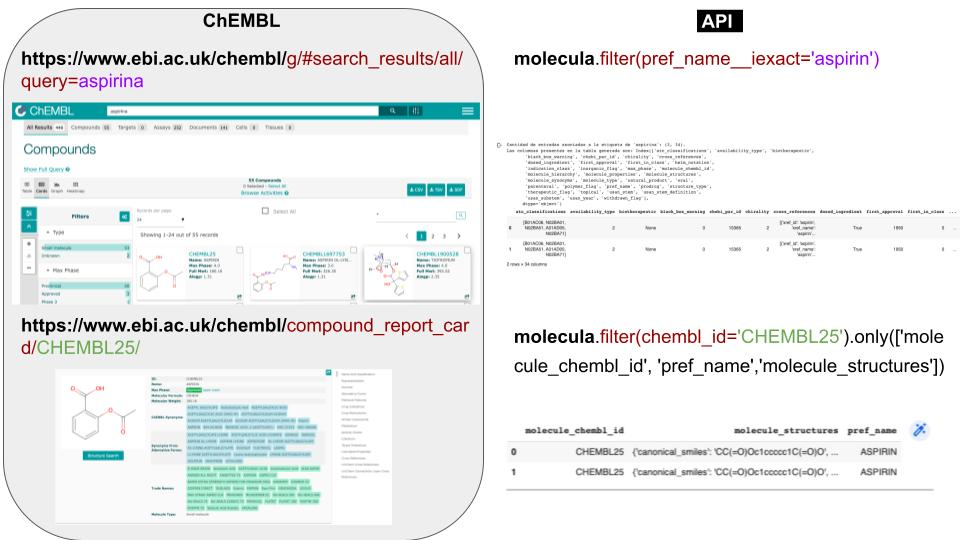

En las siguientes líneas de código se muestra como se realiza la búsqueda de la información asociada a la palabra "aspirin" en ChEMBL a través del uso de la API "new_client".

In [ ]:
molecula = new_client.molecule #Se establece el módulo a emplear (asociado al tipo de información que se recopila)
mol = molecula.filter(pref_name__iexact='aspirin') #Se filtra la información y recopila aquella que se relaciona con la palabra "aspirin"
mol_df= pd.DataFrame.from_records(mol) #Se almacena la información en una tabla
print(f"Cantidad de entradas asociadas a la etiqueta de 'aspirina': {mol_df.shape}.")
print(f"Las columnas presentes en la tabla generada son: {mol_df.columns}")
mol_df #Muestra la tabla

Cantidad de entradas asociadas a la etiqueta de 'aspirina': (2, 35).
Las columnas presentes en la tabla generada son: Index(['atc_classifications', 'availability_type', 'biotherapeutic',
       'black_box_warning', 'chebi_par_id', 'chemical_probe', 'chirality',
       'cross_references', 'dosed_ingredient', 'first_approval',
       'first_in_class', 'helm_notation', 'indication_class', 'inorganic_flag',
       'max_phase', 'molecule_chembl_id', 'molecule_hierarchy',
       'molecule_properties', 'molecule_structures', 'molecule_synonyms',
       'molecule_type', 'natural_product', 'oral', 'parenteral',
       'polymer_flag', 'pref_name', 'prodrug', 'structure_type',
       'therapeutic_flag', 'topical', 'usan_stem', 'usan_stem_definition',
       'usan_substem', 'usan_year', 'withdrawn_flag'],
      dtype='object')


,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False
1,"[B01AC06, N02BA01, N02BA51, A01AD05, N02BA71]",2,None,0,15365,0,2,"[{'xref_id': 'aspirin', 'xref_name': 'aspirin'...",True,1950,...,ASPIRIN,0,MOL,True,False,None,None,None,None,False


En el ejemplo anterior se arrojan dos entradas asociadas al input "aspirin". Esto regularmente puede pasar debido a alguna de las siguientes razones:

1. Duplicados en la base de datos: Es posible que haya múltiples entradas en la base de datos de ChEMBL que correspondan a la etiqueta indicada con información ligeramente diferente. Esto podría deberse a diferentes formas de representar la misma molécula o diferentes registros para diferentes formas o sales de la molécula.
2. Filtros de búsqueda: Es importante revisar los filtros de búsqueda que se están aplicando en el código. En el ejemplo, se está buscando la columna "pref_name" (nombre preferido) que sea igual a "aspirin" sin distinción entre mayúsculas y minúsculas. Es posible que haya múltiples entradas que cumplan con este criterio.
3. Datos actualizados: La base de datos de ChEMBL se actualiza constantemente con nueva información y registros. Puede haber diferencias en los resultados si se han realizado actualizaciones o cambios en la base de datos desde la última vez que se realizó la búsqueda.

A continuación se revisa la información contenida en la columna del identificador de ChEMBL ("ChEMBL ID") con el fin de corroborar la similitud entre la información obtenida.
Finalmente, se visualiza la molécula que se encuentra asociada a esos identificadores.

In [ ]:
#Visualizamos la información contenida en la columna de ChEMBL ID
mol_df['molecule_chembl_id']

0    CHEMBL25
1    CHEMBL25
Name: molecule_chembl_id, dtype: object

Aspirina


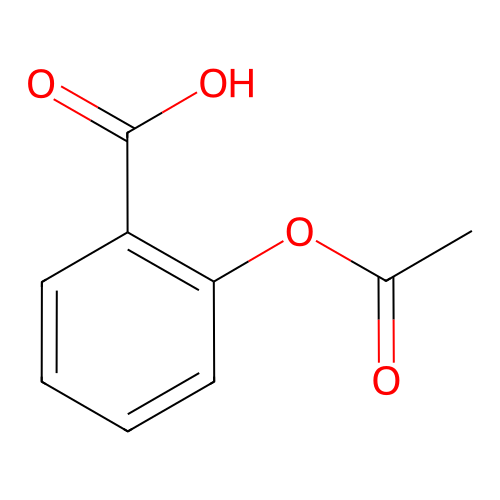

In [ ]:
imagen = new_client.image #Modulo para visualizar imágenes de moléculas
imagen.set_format('svg')
print('\033[1;30;47m' + 'Aspirina' + '\033[0m') #Formato para imprimir el nombre en negritas y sombreado

SVG(imagen.get('CHEMBL25'))

---
# **Recursos disponibles a través de la API (*endpoints*)**
---

La API de ChEMBL nos ofrece una serie de módulos, a través de los cuales se puede obtener una amplia gama de información. Esta información puede ser filtrada empleando una serie de herramientas y palabras clave que se abordarán en las siguientes secciones.

Las líneas de código que se encuentran a continuación enlistan los diferentes módulos que se pueden emplear a partir del uso de la API (columna etiquetada como '3'). En el mismo sentido, cada fila representa la estructura en programación para generar la llamada del módulo deseado en python (por ejemplo: `actividad = new_client.activity`)

In [ ]:
recursos = [recursos for recursos in dir(new_client) if not recursos.startswith('_')]
recursos_disponibles = pd.DataFrame({'3': recursos})
recursos_disponibles['1']='new_client'
recursos_disponibles['2']='.'
recursos_disponibles=recursos_disponibles[['1','2','3']]
recursos_disponibles

,1,2,3
0,new_client,.,activity
1,new_client,.,activity_supplementary_data_by_activity
2,new_client,.,assay
3,new_client,.,assay_class
4,new_client,.,atc_class
5,new_client,.,binding_site
6,new_client,.,biotherapeutic
7,new_client,.,cell_line
8,new_client,.,chembl_id_lookup
9,new_client,.,compound_record


Podemos visualizar que existen 34 módulos diferentes que nos arrojan información particular y enfocada.


---
# **Filtros disponibles (palabras clave)**
---
Existe una amplia variedad de filtros para el módulo "new_client" que nos permiten afinar las búsquedas a partir de palabras clave, las cuales son:

*   ***iexact***. Permite realizar una búsqueda sin distinguir entre mayúsculas y minúsculas.
*   ***contains***. Busca objetos que contengan un valor específico.
 *   ***icontains***. Similar a contains, pero sin distinguir entre mayúsculas y minúsculas.
*   ***in***. Busca objetos cuyo valor esté dentro de una lista de valores.

---------------------Comparaciones numéricas---------------------
 * ***gt*** (mayor que)
  * ***gte*** (mayor o igual que)
 * ***lt*** (menor que)
  * ***lte*** (menor o igual que).

----------------Comparaciones de cadena de texto----------------
 *   ***startswith***. Comienza con.
  *   ***istartswith***. Comienza con, sin distinguir entre mayúsculas y minúsculas.
 *   ***endswith***. Termina con.
  *   ***iendswith***. Termina con, sin distinguir entre mayúsculas y minúsculas.

*   ***range***. Permite buscar objetos cuyo valor esté dentro de un rango específico.
*   ***isnull***. Permite buscar objetos que tengan un campo nulo (True) o no (False).
*   ***regex***.  Permite realizar búsquedas utilizando expresiones regulares.(r'^[A-Za-z]+$', buscará objetos cuyo nombre consiste solo de letras).
 *   ***iregex***. Similar a regex, pero sin distinguir entre mayúsculas y minúsculas en la búsqueda.
----------------------------------------------------------------------
Lo anterior se permite debido a que esta API se encuentra construido a partir de Django (https://docs.djangoproject.com/en/1.11/ref/models/querysets).


## ***Doble guión bajo: __***
Es usado para emplear las palabras claves para afinar la búsqueda.

## ***Operador: only***
Only es un método que limita los resultados con base en un conjunto seleccionado de campos para una base de datos. Este método toma una lista de campos (como un solo argumento) para ser incluidos en los resultados. Al usar only se hace un llamamiento a la API de forma rápida debido a que se toma una menor cantidad de información.
Nota: cualquier campo especificado ignorará los campos anidados ("logP" es equivalente a "propiedades moleculares")


---
# ***1. Moléculas***
---

Este modulo (*molecule*) usualmente tienen asociados datos de bioactividad.
A continuacuión se presenta una definición que nos proporciona la información englobada (nombres de columnas) dentro de un submodulo de interés. El nombre de estas columnas puede ser empleado como filtro de busquéda.




In [ ]:
def information_of_resource(resource):
    for valor in resource.keys():
        print(valor)

# Suponiendo que new_client.molecule[0] ya está definido
recurso = new_client.molecule[0]
information_of_resource(recurso)

atc_classifications
availability_type
biotherapeutic
black_box_warning
chebi_par_id
chemical_probe
chirality
cross_references
dosed_ingredient
first_approval
first_in_class
helm_notation
indication_class
inorganic_flag
max_phase
molecule_chembl_id
molecule_hierarchy
molecule_properties
molecule_structures
molecule_synonyms
molecule_type
natural_product
oral
parenteral
polymer_flag
pref_name
prodrug
structure_type
therapeutic_flag
topical
usan_stem
usan_stem_definition
usan_substem
usan_year
withdrawn_flag


## Búsqueda por:

### ***Nombre exacto***
A continuación se realizará la búsqueda a partir del nombre exacto de un fármaco común (acetaminofén).


*   Módulo = ***molecule***
*   Palabra clave= ***iexact***



In [ ]:
molecula = new_client.molecule
mol = molecula.filter(pref_name__iexact='acetaminophen') #naproxen, aspirin
mol_df= pd.DataFrame.from_records(mol)
print(mol_df.info())
mol_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   atc_classifications   2 non-null      object
 1   availability_type     2 non-null      int64 
 2   biotherapeutic        0 non-null      object
 3   black_box_warning     2 non-null      int64 
 4   chebi_par_id          2 non-null      int64 
 5   chemical_probe        2 non-null      int64 
 6   chirality             2 non-null      int64 
 7   cross_references      2 non-null      object
 8   dosed_ingredient      2 non-null      bool  
 9   first_approval        2 non-null      int64 
 10  first_in_class        2 non-null      int64 
 11  helm_notation         0 non-null      object
 12  indication_class      2 non-null      object
 13  inorganic_flag        2 non-null      int64 
 14  max_phase             2 non-null      object
 15  molecule_chembl_id    2 non-null      object

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chemical_probe,chirality,cross_references,dosed_ingredient,first_approval,...,pref_name,prodrug,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_flag
0,"[N02BE51, N02BE01, N02BE71]",2,None,1,46195,0,2,"[{'xref_id': 'acetaminophen', 'xref_name': 'ac...",True,1968,...,ACETAMINOPHEN,1,MOL,True,True,None,None,None,None,False
1,"[N02BE51, N02BE01, N02BE71]",2,None,1,46195,0,2,"[{'xref_id': 'acetaminophen', 'xref_name': 'ac...",True,1968,...,ACETAMINOPHEN,1,MOL,True,True,None,None,None,None,False


In [ ]:
mol_df['molecule_chembl_id']

0    CHEMBL112
1    CHEMBL112
Name: molecule_chembl_id, dtype: object

#### Visualización de moléculas:
*   Módulo = ***image***

Paracetamol


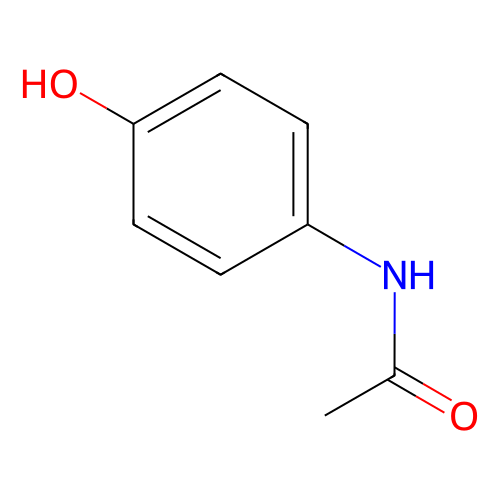

In [ ]:
imagen = new_client.image
imagen.set_format('svg')
print('\033[1;30;47m' + 'Paracetamol' + '\033[0m') #Formato de texto de la etiqueta
SVG(imagen.get('CHEMBL112'))

### ***Sinónimos***
En algunos casos es más común conocer a un compuesto por un sinónimo (módulo: *molecule_synonym*) que por su nombre preferido en ChEMBL (módulo: *pref_name*).
En este ejemplo realizaremos la búsqueda del acetaminofén a partir de su sinónimo más conocido, **paracetamol**.

*   Módulo = ***molecule***
*   Palabras clave= ***molecule_synonym***, ***istartswith***
*   Operador= ***only***



In [ ]:
mol = molecula.filter(molecule_synonyms__molecule_synonym__istartswith='parac').only('molecule_chembl_id', 'pref_name','molecule_structures', 'molecule_synonyms')
                                                                                  #'first_approval','max_phase','oral','parenteral','topical','molecule_properties')
#molecule_synonym está anidada en molecule_synonyms.
mol_df1= pd.DataFrame.from_records(mol)
#Información particular como el smiles canónico o el estándar InchiKey se encuentran anidados en
#la columna 'molecule_structures' y con las siguientes líneas es posible extraer esa información.
mol_df1['canonical_smiles'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df1['standard_inchi_key'] = mol_df1.loc[ mol_df1['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['standard_inchi_key'])

mol_df1

,molecule_chembl_id,molecule_structures,molecule_synonyms,pref_name,canonical_smiles,standard_inchi_key
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...","[{'molecule_synonym': 'Abdine', 'syn_type': 'T...",ACETAMINOPHEN,CC(=O)Nc1ccc(O)cc1,RZVAJINKPMORJF-UHFFFAOYSA-N
2,CHEMBL635,{'canonical_smiles': 'C[C@]12C=CC(=O)C=C1CC[C@...,"[{'molecule_synonym': '3en3hg4wsw', 'syn_type'...",PREDNISONE,C[C@]12C=CC(=O)C=C1CC[C@@H]1[C@@H]2C(=O)C[C@@]...,XOFYZVNMUHMLCC-ZPOLXVRWSA-N
3,CHEMBL57053,"{'canonical_smiles': 'Oc1ccc(Cl)cc1', 'molfile...","[{'molecule_synonym': 'Parachlorophenol', 'syn...",PARACHLOROPHENOL,Oc1ccc(Cl)cc1,WXNZTHHGJRFXKQ-UHFFFAOYSA-N
4,CHEMBL1196,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Alcaine', 'syn_type': '...",PROPARACAINE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N,KCLANYCVBBTKTO-UHFFFAOYSA-N
5,CHEMBL398440,"{'canonical_smiles': 'Cc1cc(O)cc(C)c1Cl', 'mol...","[{'molecule_synonym': 'Chloroxylenol', 'syn_ty...",CHLOROXYLENOL,Cc1cc(O)cc(C)c1Cl,OSDLLIBGSJNGJE-UHFFFAOYSA-N
6,CHEMBL1200464,{'canonical_smiles': 'CCCOc1ccc(C(=O)OCCN(CC)C...,"[{'molecule_synonym': 'Ak-taine', 'syn_type': ...",PROPARACAINE HYDROCHLORIDE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N.Cl,BFUUJUGQJUTPAF-UHFFFAOYSA-N
7,CHEMBL1410743,"{'canonical_smiles': 'CC1OC(C)OC(C)O1', 'molfi...","[{'molecule_synonym': '2,4,6-trimethyl-s-triox...",PARALDEHYDE,CC1OC(C)OC(C)O1,SQYNKIJPMDEDEG-UHFFFAOYSA-N


Comparar información obtenida con la información arrojada a través de la interfaz gráfica de ChEMBL ([Clic aquí](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL112/))

### ***ChEMBL ID***
*   Módulo = ***molecule***
*   Palabra clave= ***in***
*   Operador= ***only***

ChEMBL ID: identificador estable diseñado para una búsqueda directa de datos ([click aquí](**https**://www.ebi.ac.uk/chembl/)).

Está búsqueda se puede realizar a partir de un solo o  múltiples identificadores. Para este ejemplo se consideran los identificadores para la aspirina (CHEMBL25), paracetamol (CHEMBL112) y naproxeno (CHEMBL154).


In [ ]:
#mol = molecula.filter(chembl_id='CHEMBL25').only(['molecule_chembl_id', 'pref_name',
 #                                                  'molecule_structures'])
mol = molecula.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL112', 'CHEMBL154',]).only(['molecule_chembl_id', 'pref_name'])
mol_df2= pd.DataFrame.from_records(mol)
mol_df2

,molecule_chembl_id,pref_name
0,CHEMBL25,ASPIRIN
1,CHEMBL25,ASPIRIN
2,CHEMBL112,ACETAMINOPHEN
3,CHEMBL154,NAPROXEN


### ***Inchi Key standar***

*   Módulo = ***molecule***
*   Palabra clave= ***standard_inchi_key***
*   Operador= ***only***

In [ ]:
mol = molecula.filter(molecule_structures__standard_inchi_key='RZVAJINKPMORJF-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df3= pd.DataFrame.from_records(mol)
mol_df3

,molecule_chembl_id,molecule_structures,pref_name
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN


### ***SMILES***
*   Módulo = ***molecule***
*   Palabra clave= ***canonical_smiles***
*   Operador= ***only**

In [ ]:
mol = molecula.filter(molecule_structures__canonical_smiles='CC(=O)Nc1ccc(O)cc1').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df4= pd.DataFrame.from_records(mol)
mol_df4

,molecule_chembl_id,molecule_structures,pref_name
0,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN
1,CHEMBL112,"{'canonical_smiles': 'CC(=O)Nc1ccc(O)cc1', 'mo...",ACETAMINOPHEN


### ***Similitud, considerando:***


#### ***SMILES***
*   Módulo = ***similarity*** (métrica empleada: coeficiente de tanimoto)
*   Operador= ***only***


In [ ]:
similarity = new_client.similarity
res = similarity.filter(smiles="CC(=O)Nc1ccc(O)cc1", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL112', 'similarity': '100'}
{'molecule_chembl_id': 'CHEMBL1360012', 'similarity': '76.9230782985687255859375'}


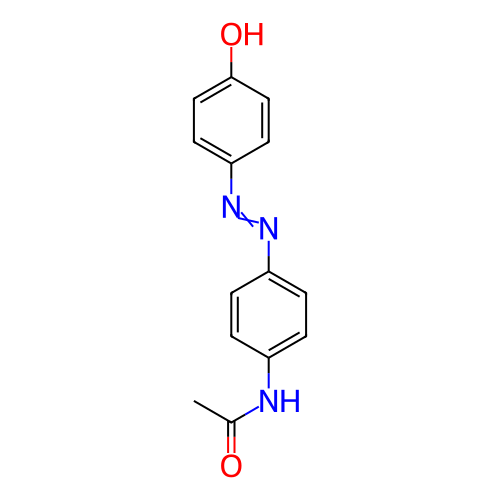

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL1360012'))
#SVG(image.get('CHEMBL112'))

#### ***ChEMBL ID***

*   Módulo = ***similarity***
*   Operador= ***only***


In [ ]:
res = similarity.filter(chembl_id='CHEMBL1360012',
                        similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL112', 'pref_name': 'ACETAMINOPHEN', 'similarity': '76.9230782985687255859375'}
{'molecule_chembl_id': 'CHEMBL1483163', 'pref_name': None, 'similarity': '73.33333492279052734375'}
{'molecule_chembl_id': 'CHEMBL311003', 'pref_name': None, 'similarity': '73.33333492279052734375'}


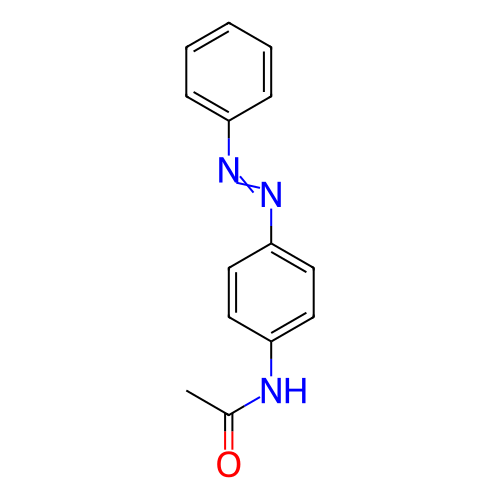

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL1483163'))
#SVG(image.get('CHEMBL112'))

### ***Conectividad***
Las siguientes líneas de código identifican moléculas que tengan una conectividad similar a una representación molecular (SMILES) de referencia.
*   Módulo = ***molecule***
*   Palabra clave= ***canonical_smiles***, ***connectivity***
*   Operador= ***only***

In [ ]:
res = molecula.filter(molecule_structures__canonical_smiles__connectivity='CC(=O)NC1=CC=C(C=C1)').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol_df5= pd.DataFrame.from_records(res)
mol_df5['canonical_smiles'] = mol_df5.loc[ mol_df5['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles'])
mol_df5

,molecule_chembl_id,molecule_structures,pref_name,canonical_smiles
0,CHEMBL269644,"{'canonical_smiles': 'CC(=O)Nc1ccccc1', 'molfi...",ACETANILIDE,CC(=O)Nc1ccccc1
1,CHEMBL269644,"{'canonical_smiles': 'CC(=O)Nc1ccccc1', 'molfi...",ACETANILIDE,CC(=O)Nc1ccccc1
2,CHEMBL3349336,{'canonical_smiles': 'CC(=O)Nc1ccccc1.O=S(=O)(...,None,CC(=O)Nc1ccccc1.O=S(=O)(O)O


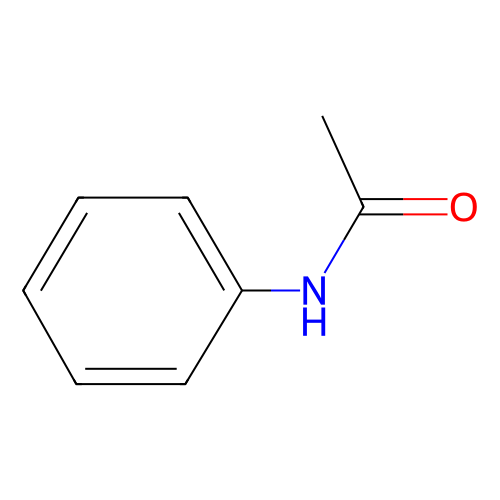

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL269644'))
#SVG(image.get('CHEMBL112'))

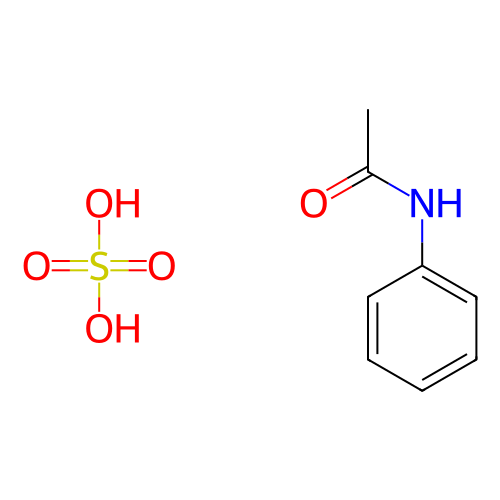

In [ ]:
imagen.set_format('svg')
SVG(imagen.get('CHEMBL3349336'))
#SVG(image.get('CHEMBL112'))

### ***Subestructuras***
Las siguientes líneas de código identifican moléculas que tengan subestructuras similares a una de interes:.
*   Módulo = ***substructure***

In [ ]:
substructure = new_client.substructure
result = substructure.filter(smiles="c1ccccc1")
print(len(result))

## ***Uso de Filtros***

### ***Compuestos bioterapéuticos***
Con las siguientes líneas de código se buscarán todas las moléculas bioterapeuticas.
*   Módulo = ***molecule***
*   Palabra clave= ***isnull***

In [ ]:
bioterapeuticos = molecula.filter(biotherapeutic__isnull=False)
len(bioterapeuticos)

23047

### ***MW<300***
El filtro empleado a continuación solo selecciona aquellas moléculas que tienen un peso moleculer menor a 300 kDa.

*   Módulo= ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***

In [ ]:
moleculas_ligeras = molecula.filter(molecule_properties__mw_freebase__lte=300)
len(moleculas_ligeras)

423016

### ***Filtros anidados***


Puedes usar varios filtros anidados separados por comas:

*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operador= ***only***


In [ ]:
#En las siguientes líneas se buscan moléculas que contengan en su nombre preferido la terminación "INE" y un MW<300
moleculas_ligeras_nib = molecula.filter(molecule_properties__mw_freebase__lte=300,
                                        pref_name__iendswith="ine").only(['molecule_chembl_id', 'pref_name'])
mol_df6= pd.DataFrame.from_records(moleculas_ligeras_nib)
mol_df6=mol_df6.sort_values(by='pref_name').reset_index(inplace=False)
mol_df6[0:10]

,index,molecule_chembl_id,pref_name
0,353,CHEMBL298517,(+)-EPIBATIDINE
1,870,CHEMBL501778,(+)-HIGENAMINE
2,371,CHEMBL60542,(+)-PENTAZOCINE
3,415,CHEMBL76640,(+)-PHYSOSTIGMINE
4,805,CHEMBL257990,(+)-TRANYLCYPROMINE
5,1039,CHEMBL535389,(+/-)-HOMOEPIBATIDINE
6,1796,CHEMBL2414990,(+/-)-NUCIFERINE
7,1795,CHEMBL2414988,(+/-)-ROEMREFIDINE
8,177,CHEMBL440464,(+/-)NICOTINE
9,1718,CHEMBL2236571,(-)-(S)-EDULININE


In [ ]:
mol_df6

,index,molecule_chembl_id,pref_name
0,353,CHEMBL298517,(+)-EPIBATIDINE
1,870,CHEMBL501778,(+)-HIGENAMINE
2,371,CHEMBL60542,(+)-PENTAZOCINE
3,415,CHEMBL76640,(+)-PHYSOSTIGMINE
4,805,CHEMBL257990,(+)-TRANYLCYPROMINE
...,...,...,...
1853,1776,CHEMBL2311152,[3H]NOREPINEPHRINE
1854,1757,CHEMBL2281472,bishomocubyl-10-amine
1855,1723,CHEMBL2251847,carbocyclic Nebularine
1856,6,CHEMBL6368,p-IODOAMPHETAMINE


### ***Cumplimiento de guías de interés farmacéutico (Lipinski y Veber)***
*   Módulo = ***molecule***
*   Palabra clave= ***num_ro5_violations***


In [ ]:
sin_violaciones = molecula.filter(molecule_properties__num_ro5_violations=0)
len(sin_violaciones)

1655867

---
# ***2. Fármacos***
---
En contraste con los compuestos, los fármacos (fase 4, max_phase=4) y los candidatos clínicos (fase 1, 2 y 3) en ChEMBL normalmente tienen información curada y no tienen que tener necesariamente mediciones de bioactividad asociada.
Los datos en la API drugs se agrega dentro del parentesco del fármaco.

*   Módulo= ***drug***
*   Operador= ***only***


## ***Obtención de todos los fármacos***

In [ ]:
farmaco = new_client.drug
res = farmaco.only(['development_phase','first_approval','molecule_chembl_id',
                    'synonyms',  'usan_stem','usan_stem_definition',  'usan_year'])
farmaco_df1= pd.DataFrame.from_records(res)
farmaco_df1

,applicants,atc_code_description,development_phase,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,4.0,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (FDA, JAN, MI, USAN, U...",-azosin,antihypertensives (prazosin type),1968.0
1,None,None,4.0,1976.0,CHEMBL2,None,"[Prazosin hydrochloride (FDA, JAN, MI, USAN, U...",-azosin,antihypertensives (prazosin type),1968.0
2,None,None,4.0,1984.0,CHEMBL3,None,"[Nicotine bitartrate (MI, USAN), Nicotine bita...",None,None,1985.0
3,None,None,4.0,1990.0,CHEMBL4,None,"[Ofloxacin (BAN, FDA, INN, JAN, MI, USAN, USP), ]",-oxacin,antibacterials (quinolone derivatives),1984.0
4,None,None,4.0,1964.0,CHEMBL5,None,"[Nalidixate sodium (USAN), Nalidixic acid (BAN...",nal-,narcotic agonists/antagonists (normorphine type),1962.0
...,...,...,...,...,...,...,...,...,...,...
14801,None,None,2.0,NaN,CHEMBL5095509,None,[Ddp-225],None,None,NaN
14802,None,None,None,NaN,CHEMBL5219790,None,[Cetrimide],None,None,NaN
14803,None,None,None,NaN,CHEMBL5219942,None,[Cetrimide],None,None,NaN
14804,None,None,None,NaN,CHEMBL5219994,None,[Acriflavine],None,None,NaN


## ***Empleo de filtros***
A partir de la búsqueda anterior se considera la aplicación de filtros.
*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase***, ***lte***,  ***pref_name***, ***iendswith***
*   Operador= ***only***

#### ***Año de liberación, sinónimos y palabras clave de los sinónimos***

El "USAN" (United States Adopted Names) es un sistema para designar nombres genéricos para los medicamentos en los Estados Unidos. Los nombres USAN son seleccionados por la American Medical Association (AMA) y otras organizaciones. Un "stem" en este contexto se refiere a una parte común de un nombre de medicamento que indica su clase o categoría.
Corresponde a la designación de nombres genéricos de medicamentos.

In [ ]:
res = farmaco.filter(first_approval__gte=1980).filter(usan_stem="-azosin").only(['development_phase',
                                                                                 'first_approval','molecule_chembl_id',
                                                                                 'synonyms','usan_stem',
                                                                                 'usan_stem_definition','usan_year'])
farmaco_df2= pd.DataFrame.from_records(res)
farmaco_df2

,applicants,atc_code_description,development_phase,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,4.0,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
1,None,None,4.0,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
2,None,None,4.0,1990,CHEMBL707,None,"[Doxazosin mesilate (JAN), Doxazosin mesylate ...",-azosin,antihypertensives (prazosin type),1981


#### ***Fase clínica máxima, clasificación ATC y año de aprobación***
A continuación se considera la búsqueda de fármacos aprobados teniendo en cuenta la fase clínica máxima 4, la denominación ATC para inmunosupresores y el año de aprobación correspondiente.
*   Módulo = ***molecule***
*   Palabra clave= ***mw_freebase, lte, pref_name, iendswith***
*   Operador= ***only***


In [ ]:
farmacos_aprobados = molecula.filter(max_phase=4, #solo fármacos aprobados
                                atc_classifications__level2='L04', #Clasificación ATC de inmunosupresores
                                first_approval__gte=2022 #Aprobados despues del 2022 )
                                ).order_by('first_approval').only(['atc_classifications','first_approval','indication_class','max_phase','pref_name','molecule_type', 'molecule_chembl_id'])
farmaco_df2= pd.DataFrame.from_records(farmacos_aprobados)
farmaco_df2

,atc_classifications,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_type,pref_name
0,[L04AA55],2022,None,4.0,CHEMBL4297832,Antibody,SUTIMLIMAB
1,[L04AA55],2022,None,4.0,CHEMBL4297832,Antibody,SUTIMLIMAB
2,[L04AC22],2022,None,4.0,CHEMBL4297911,Antibody,SPESOLIMAB
3,[L04AA56],2022,None,4.0,CHEMBL4596392,Small molecule,DEUCRAVACITINIB


## ***Identificación de:***


#### ***Moléculas considerando enfermedades***
A continuación se considera la búsqueda de fármacos que se encuentren en fase clínica 3 para una enfermedad particular, en este caso se considera al cáncer de pulmón.
*   Módulo = ***drug***
*   Palabra clave= ***indication***
*   Operador= ***only***

In [ ]:
indicacion_farmaceutica = new_client.drug_indication
cancer_pulmon_indicacion = indicacion_farmaceutica.filter(efo_term__icontains="LUNG CARCINOMA", max_phase_for_ind = 3)
cancer_pulmon_fase3 = molecula.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in cancer_pulmon_indicacion]).only(['molecule_chembl_id','molecule_properties'])
cancer_pulmon_fase3 = pd.DataFrame(cancer_pulmon_fase3)

#Las siguientes líneas desglosan las propiedades fisicoquímicas de interés, de las moléculas que cumplen con los filtros previos.
cancer_pulmon_fase3['mw_freebase'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['mw_freebase'])
cancer_pulmon_fase3['alogp'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['alogp'])
cancer_pulmon_fase3['aromatic_rings'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['aromatic_rings'])
cancer_pulmon_fase3['full_molformula'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['full_molformula'])
cancer_pulmon_fase3['hba'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hba'])
cancer_pulmon_fase3['hbd'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['hbd'])
cancer_pulmon_fase3['heavy_atoms'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['heavy_atoms'])
cancer_pulmon_fase3['molecular_species'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['molecular_species'])
cancer_pulmon_fase3['num_lipinski_ro5_violations'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['num_lipinski_ro5_violations'])
cancer_pulmon_fase3['psa'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['psa'])
cancer_pulmon_fase3['rtb'] = cancer_pulmon_fase3.loc[ cancer_pulmon_fase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['rtb'])

cancer_pulmon_fase3.head()

,molecule_chembl_id,molecule_properties,mw_freebase,alogp,aromatic_rings,full_molformula,hba,hbd,heavy_atoms,molecular_species,num_lipinski_ro5_violations,psa,rtb
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log...",180.16,1.31,1.0,C9H8O4,3.0,1.0,13.0,ACID,0.0,63.60,2.0
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log...",300.44,5.60,0.0,C20H28O2,1.0,1.0,22.0,ACID,1.0,37.30,5.0
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log...",232.28,1.86,2.0,C13H16N2O2,2.0,2.0,17.0,NEUTRAL,0.0,54.12,4.0
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log...",586.69,4.09,3.0,C33H38N4O6,9.0,1.0,43.0,BASE,1.0,114.20,4.0
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log...",421.45,1.85,3.0,C23H23N3O5,8.0,2.0,31.0,BASE,0.0,104.89,3.0


In [ ]:
#Las propiedades que pueden ser extraídas son las siguientes:
properties = cancer_pulmon_fase3['molecule_properties'].iloc[0]
print(json.dumps(properties, indent=4))

{
    "alogp": "1.31",
    "aromatic_rings": 1,
    "cx_logd": "-2.16",
    "cx_logp": "1.24",
    "cx_most_apka": "3.41",
    "cx_most_bpka": null,
    "full_molformula": "C9H8O4",
    "full_mwt": "180.16",
    "hba": 3,
    "hba_lipinski": 4,
    "hbd": 1,
    "hbd_lipinski": 1,
    "heavy_atoms": 13,
    "molecular_species": "ACID",
    "mw_freebase": "180.16",
    "mw_monoisotopic": "180.0423",
    "np_likeness_score": "0.12",
    "num_lipinski_ro5_violations": 0,
    "num_ro5_violations": 0,
    "psa": "63.60",
    "qed_weighted": "0.55",
    "ro3_pass": "N",
    "rtb": 2
}


### ***Mecanismo de acción***
A continuación se realiza la búsqueda de moléculas interactuantes con un blanco (receptor de insulina) y se identifica su respectivo mecanismo de acción.
*   Módulo= ***mechanism***
*   Operador= ***only***

In [ ]:
mecanismo = new_client.mechanism
res = mecanismo.filter(target_chembl_id='CHEMBL1981' #Receptor de insulina
                      ).only(['action_type','max_phase','mechanism_comment',
                              'mechanism_of_action','molecule_chembl_id', 'target_chembl_id'])
farmaco_df3= pd.DataFrame.from_records(res)
farmaco_df3

,action_type,max_phase,mechanism_comment,mechanism_of_action,molecule_chembl_id,target_chembl_id
0,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
1,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
2,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201540,CHEMBL1981
3,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201629,CHEMBL1981
4,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201644,CHEMBL1981
5,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201639,CHEMBL1981
6,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201542,CHEMBL1981
7,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201543,CHEMBL1981
8,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201631,CHEMBL1981
9,AGONIST,4,None,Insulin receptor agonist,CHEMBL1201656,CHEMBL1981


### ***Alertas farmacéuticas***
A continuación se realiza la búsqueda de compuestos que hayan presentado algún tipo de alerta farmacéutica de interés.
*   Módulo = ***drug***
*   Palabra clave= ***warning***


In [ ]:
alerta_farmaco = new_client.drug_warning
res = alerta_farmaco.filter(warning_type='Withdrawn', warning_class='carcinogenicity') #carcinogenicity, neurotoxicity
farmaco_df4= pd.DataFrame.from_records(res)
farmaco_df4

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
1,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL110691,CHEMBL110691,carcinogenicity,United States; United Kingdom,Animal carcinogenicity (dogs),2868,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1970
2,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL44618,CHEMBL44618,carcinogenicity,United States,carcinogenic in mice and rats,2870,"[{'ref_id': '10.1021/cen-v054n016.p007', 'ref_...",Withdrawn,1976
3,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL2104489,CHEMBL2104489,carcinogenicity,Germany; Austria,Animal Carcinogenicity,2876,"[{'ref_id': 'CL12.pdf', 'ref_type': 'WHO', 're...",Withdrawn,1969
4,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL360328,CHEMBL360328,carcinogenicity,United States,Carcinogenicity,2906,[{'ref_id': 'drug-safety-and-availability/fda-...,Withdrawn,2020
5,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL16476,CHEMBL16476,carcinogenicity,United Kingdom,Animal carcinogenicity (rodent),2943,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1965
6,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788386,CHEMBL1788386,carcinogenicity,Oman,Potential risk of carcinogenicity,2953,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
7,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL1788403,CHEMBL1788403,carcinogenicity,Oman,Potential risk of carcinogenicity,3100,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997
8,EFO:0009260,EFO:0011046,non-melanoma skin carcinoma,CHEMBL1863513,CHEMBL1863513,carcinogenicity,European Union; Canada,Increased risk of non-melanoma skin cancer,3121,[{'ref_id': 'recall-alert-rappel-avis/hc-sc/20...,Withdrawn,2020
9,EFO:0011046,EFO:0011046,carcinogenicity,CHEMBL53418,CHEMBL53418,carcinogenicity,United States; Canada,May have a carcinogenic potential,3126,"[{'ref_id': 'EDM-QSM-2001.3', 'ref_type': 'WHO...",Withdrawn,1997


#### ***Tipo de alerta***
Se puede realizar la búsqueda a partir de una palabra clave.
*   Módulo= ***drug***
*   Palabra clave= ***icontains***


In [ ]:
res = alerta_farmaco.filter(warning_class__icontains='cardio')#, warning_type='Black Box Warning')
farmaco_df5= pd.DataFrame.from_records(res)
farmaco_df5

,efo_id,efo_id_for_warning_class,efo_term,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
1,None,EFO:1001482,None,CHEMBL270190,CHEMBL270190,cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,NaN
2,None,EFO:1001482,None,CHEMBL1083993,CHEMBL633,cardiotoxicity,United States,None,98,[{'ref_id': '730039c2-0a32-4775-855d-98b2207e9...,Black Box Warning,NaN
3,None,EFO:1001482,None,CHEMBL501,CHEMBL405,cardiotoxicity,United States,None,109,[{'ref_id': 'f469fb38-0380-4621-9db3-a4f429126...,Black Box Warning,NaN
4,None,EFO:1001482,None,CHEMBL2362016,CHEMBL2362016,cardiotoxicity,United States,None,135,[{'ref_id': 'a482eccd-8837-47ea-904d-2f2c294d1...,Black Box Warning,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
169,EFO:1001482,EFO:1001482,cardiotoxicity,CHEMBL16080,CHEMBL16080,cardiotoxicity,United States,potentially toxic to the cardiovascular system...,3710,"[{'ref_id': 'FR-1998-10-08/html/98-26923.htm',...",Withdrawn,1977.0
170,None,EFO:1001482,None,CHEMBL4585668,CHEMBL4585668,cardiotoxicity,United States,None,3728,[],Black Box Warning,NaN
171,None,EFO:1001482,None,CHEMBL1200322,CHEMBL1508,cardiotoxicity,United States,None,3738,[],Black Box Warning,NaN
172,None,EFO:1001482,None,CHEMBL2364649,CHEMBL2364649,cardiotoxicity,United States,None,3746,[],Black Box Warning,NaN


---
# ***3. Blancos moleculares***
---
Igual que en los casos anteriores, la búsqueda de un blanco molecular se puede realizar a partir de diferentes rutas.
Para los siguientes ejemplos consideraremos a G9a, una lisin-metiltransferasa de histonas involucrada en modificaciones epigenéticas de importancia.


## ***Búsqueda a partir del:***

### ***Nombre de un gen***
*   Módulo = ***target***
*   Palabra clave= ***icontains***
*   Operador= ***only***

In [ ]:
blanco_molecular = new_client.target
gene_name = 'G9a'
res = blanco_molecular.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Histone-lysine N-methyltransferase, H3 lysine-9 specific 5', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'Histone-lysine N-methyltransferase, H3 lysine-9 specific 3', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Mus musculus', 'pref_name': 'Histone-lysine N-methyltransferase EHMT2', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'Histone-lysine N-methyltransferase EHMT1/EHMT2', 'target_type': 'PROTEIN FAMILY'}
{'organism': 'Mus musculus', 'pref_name': 'Autophagy-related protein 9A', 'target_type': 'SINGLE PROTEIN'}


### ***Uniprot_id***
El ID de Uniprot para G9a es *Q96KQ7*.
*   Módulo = ***target***
*   Palabra clave= ***accession***

In [ ]:
uniprot_id = 'Q96KQ7'
res = blanco_molecular.filter(target_components__accession=uniprot_id)
blancos_df1= pd.DataFrame.from_records(res)
blancos_df1

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q96KQ7', 'xref_name': None, 'xre...",Homo sapiens,"Histone-lysine N-methyltransferase, H3 lysine-...",False,CHEMBL6032,"[{'accession': 'Q96KQ7', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'Q96KQ7', 'xref_name': None, 'xre...",Homo sapiens,"Histone-lysine N-methyltransferase, H3 lysine-...",False,CHEMBL6032,"[{'accession': 'Q96KQ7', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Homo sapiens,Histone-lysine N-methyltransferase EHMT1/EHMT2,False,CHEMBL3885593,"[{'accession': 'Q9H9B1', 'component_descriptio...",PROTEIN FAMILY,9606


### ***Nombre de la proteína***
*   Módulo= ***target***
*   Palabra clave= ***accession***
*   Operador= ***only***

In [ ]:
protein_name = 'N-methyltransferase'
res = blanco_molecular.filter(pref_name__icontains=protein_name).only(['organism','pref_name',
                                                                       'target_chembl_id',
                                                                       'target_type']).order_by(['pref_name','organism'])
blancos_df2= pd.DataFrame.from_records(res)
blancos_df2

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Cereblon/Histone-lysine N-methyltransferase PR...,CHEMBL4742318,PROTEIN-PROTEIN INTERACTION
1,Homo sapiens,Cereblon/Histone-lysine N-methyltransferase PR...,CHEMBL4742318,PROTEIN-PROTEIN INTERACTION
2,Homo sapiens,Glycine N-methyltransferase,CHEMBL4523295,SINGLE PROTEIN
3,Homo sapiens,Guanidinoacetate N-methyltransferase,CHEMBL4523290,SINGLE PROTEIN
4,Cavia porcellus,Histamine N-methyltransferase,CHEMBL4485,SINGLE PROTEIN
...,...,...,...,...
61,Homo sapiens,Protein arginine N-methyltransferase 7,CHEMBL3562175,SINGLE PROTEIN
62,Homo sapiens,Protein arginine N-methyltransferase 8,CHEMBL3108648,SINGLE PROTEIN
63,Homo sapiens,Protein arginine N-methyltransferase 9,CHEMBL4105724,SINGLE PROTEIN
64,Homo sapiens,Putative histone-lysine N-methyltransferase PRDM6,CHEMBL5214858,SINGLE PROTEIN


---
# ***4. Actividades***
---
Con el siguiente módulo es posible obtener toda la información asociada a la actividad reportada para un compuesto o para un blanco molecular.
A continuación se obtendrán las actividades reportadas (IC50) asociadas a un blanco.
*   Módulo = ***activity***
*   Palabra clave= ***_iexact***
*   Operador= ***only***


In [ ]:
actividad = new_client.activity
herg = blanco_molecular.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = actividad.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")
len(herg_activities)

15255

Se puede obtener todas las actividades reportadas para un blanco especifico considerando ensayos de unión (tipo B).

In [ ]:
res = actividad.filter(target_chembl_id='CHEMBL3938', assay_type='B') #,pchembl_value__isnull=False)
print(len(res))
assay_b= pd.DataFrame.from_records(res)
assay_b

910


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Not Active,1650747,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
1,None,Not Active,1650747,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
2,None,Not Active,1650748,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
3,None,Not Active,1650749,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,None,None,None,None
4,None,None,1650750,[],CHEMBL860783,Average Binding Constant for STK16; NA=Not Act...,B,None,None,BAO_0000034,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,Kd,uM,UO_0000065,None,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,None,None,24958275,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5213178,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,3.4
907,None,None,24958308,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5213310,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,1.5
908,None,None,24958332,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5213439,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,7.7
909,None,None,24958389,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5213628,Selectivity interaction (KinomeScan (DiscoverX...,B,None,None,BAO_0000179,...,Homo sapiens,Serine/threonine-protein kinase 16,9606,None,None,% of control,%,UO_0000187,None,53.0


---
# ***5. Ensayos***
---
A continuación, se lleva a cabo una búsqueda de ensayos de inhibición relacionados con ADMET (tipo A), medidos en organismos específicos.


*   Módulo = ***assay***
*   Palabra clave= ***icontains***
*   Operador= ***only***



In [ ]:
ensayo = new_client.assay
res = ensayo.filter(description__icontains='inhibit', assay_type='A',
                    assay_organism='Rattus norvegicus').only(['assay_chembl_id','assay_organism','description'])
ensayos_df1= pd.DataFrame.from_records(res)
ensayos_df1

,assay_chembl_id,assay_organism,description
0,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
1,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
2,CHEMBL615148,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 16-...
3,CHEMBL615199,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 2-a...
4,CHEMBL883800,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
...,...,...,...
629,CHEMBL5157675,Rattus norvegicus,Inhibition of phosphate uptake in CRL:CD(SD) r...
630,CHEMBL5160540,Rattus norvegicus,Inhibition of CYP2C19 in rat liver microsomes ...
631,CHEMBL5160615,Rattus norvegicus,Inhibition of CYP3A4 in rat liver microsomes a...
632,CHEMBL5160616,Rattus norvegicus,Inhibition of CYP2D6 in rat liver microsomes a...


## ***Toxicidad***
A continuación se muestra cómo se pueden encontrar ensayos que evalúan algún tipo de toxicidad a través del módulo *drug_warning*.
*   Módulo = ***assay***
*   Palabra clave= ***icontains***
*   Operador= ***only***

In [ ]:
res = ensayo.filter(description__icontains='kidney').only(['assay_chembl_id', #Búsqueda de toxicidad en riñón.
                                                                               'assay_organism','description'])
ensayos_df2= pd.DataFrame.from_records(res)
ensayos_df2

,assay_chembl_id,assay_organism,description
0,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
1,CHEMBL827088,None,Percent inhibition against 11-beta-hydroxyster...
2,CHEMBL615234,None,Percent inhibition against 11-beta-hydroxyster...
3,CHEMBL615699,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
4,CHEMBL615700,Sus scrofa,"Percent inhibition was measured against 5,10-M..."
...,...,...,...
7060,CHEMBL5216973,Mus musculus,Toxicity in nude BALB/c nude mouse xenografted...
7061,CHEMBL5217005,Sus scrofa,Inhibition of porcine kidney DAAO using D-seri...
7062,CHEMBL5217006,Sus scrofa,Inhibition of porcine kidney DAAO using D-seri...
7063,CHEMBL5217828,Macaca fascicularis,Renal toxicity in cynomolgus monkey assessed a...


---
# ***6. Tejido***
---


## ***Búsqueda a partir de:***

### ***Uberon id***
Puedes obtener un tejido en particular usado ***Uberon id*** (UBERON es una ontologia de anatomía entre especies).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/ols/ontologies/uberon#:~:text=Uberon%20is%20an%20integrated%20cross,structure%2C%20function%20and%20developmental%20lineage).

*   Módulo = ***tissue***


In [ ]:
tejido = new_client.tissue
res = tejido.filter(uberon_id="UBERON:0000177")#Pus
ensayos_df3= pd.DataFrame.from_records(res)
ensayos_df3

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Pus,CHEMBL3987929,UBERON:0000177
1,None,None,None,Pus,CHEMBL3987929,UBERON:0000177


### ***Nombre del tejido***
A continuación se obtiene la información de los tejidos que contienen la palabra "blood" en su nombre.
*   Palabra clave= ***istarthwith***


In [ ]:
res = tejido.filter(pref_name__icontains='bra') #Cerebro
ensayos_df4= pd.DataFrame.from_records(res)
ensayos_df4[0:3]

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
1,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
2,BTO:0000142,TS-0095,EFO:0000302,Brain,CHEMBL3638188,UBERON:0000955


### ***BTO ID***
Obtener tejido por ***BTO ID*** (Ontologia de Tejidos Brenda).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/ols/ontologies/bto#:~:text=A%20structured%20controlled%20vocabulary%20for,cell%20types%20and%20cell%20cultures).


In [ ]:
res = tejido.filter(bto_id="BTO:0001307") #Estómago
ensayos_df5= pd.DataFrame.from_records(res)
ensayos_df5[0:3]

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945
1,BTO:0001307,TS-0980,EFO:0000837,Stomach,CHEMBL3638185,UBERON:0000945


### ***EFO ID***
Obtener tejidos por ***EFO id*** (Ontologia de Factores Experimentales).

Para más información visita la siguiente [liga](https://www.ebi.ac.uk/efo/).



In [ ]:
res = tejido.filter(efo_id="EFO:0000967") #Cuello
ensayos_df6= pd.DataFrame.from_records(res)
ensayos_df6[0:3]

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974
1,BTO:0000420,TS-2045,EFO:0000967,Neck,CHEMBL3987857,UBERON:0000974


---
# ***7. Células***
---

## ***Búsqueda a partir de:***

### ***Cellosaurus id***
Para mayor información visita la siguiente [liga](https://www.cellosaurus.org/)
*   Módulo= ***cell_line***


In [ ]:
linea_celular = new_client.cell_line
res = linea_celular.filter(cellosaurus_id="CVCL_0417") #Breast metastasis of melanoma cells
ensayos_df7= pd.DataFrame.from_records(res)
ensayos_df7[0:3]

,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213
1,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213


### ***Descripción***
En este caso se obtendrán células descritas como linfoma.
*   Palabra clave= ***icontains***

In [ ]:
res = linea_celular.filter(cell_description__icontains="lymphoma")
ensayos_df8= pd.DataFrame.from_records(res)
ensayos_df8[0:3]

,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
1,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
2,CHEMBL3308006,U-937 (Histiocytic lymphoma cells),379,U-937,Homo sapiens,9606.0,Histiocytic lymphoma cells,CVCL_0007,LCL-1125,CLO_0009465,EFO_0001257


---
# ***8. Utilidades***
---


## ***Convertir SMILES a CTAB***
*   Módulo = ***utils***


CTAB: es un archivo tipo mol o sdf. "Connection Table". CTAB es una representación de texto plano utilizada para describir la estructura molecular de una sustancia química.



In [ ]:
aspirina = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
aspirina

'\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   -1.8012   -1.1888    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.7990   -0.1888    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.9320    0.3096    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0672   -0.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0690   -1.1922    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7960   -1.6940    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6630   -1.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6650   -0.1956    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8000    0.3062    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8020    1.3060    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0630    1.8078    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6690    1.8042    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.6640    0.3130    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2 

## ***Calcular...***

### ***La subestructura común máxima***
Permite encontrar la porción más significativa y compartida de las estructuras moleculares,

In [ ]:
smiles = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]
mols = [utils.smiles2ctab(smile) for smile in smiles]
sdf = ''.join(mols)
result = utils.mcs(sdf)
result

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

### ***Descriptores moleculares***

In [ ]:
aspirina = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
descs = json.loads(utils.chemblDescriptors(aspirina))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

### ***Alertas estructurales***

In [ ]:
alerts = json.loads(utils.structuralAlerts(aspirina))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


### ***Molécula madre a partir de su identificador SMILES***


In [ ]:
par = json.loads(utils.getParent(mol))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 18 18  0  0  0  0  0  0  0  0999 V2000\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4960    0.5936    0.0000 C   0  0  0  0  0  0  0  0

## ***Estandarizar una molécula***

In [ ]:
mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n   -1.4275   -2.9831    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.9566   -0.4188    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -4.0888   -0.9158    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2246   -0.4126    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.2282    0.5874    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.3568   -0.9096    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.4926   -0.4064    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6248   -0.9034    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2394   -0.4002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2360    0.5998    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.1000    1.1028    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.9680    0.6060    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.6320    1.0968    0.0000 C   0  0  0  0  0  0  0 

---
# ***9. Ejercicio global***
---


A continuación se desarrollará un ejercicio global partiendo de la búsqueda de moléculas pequeñas en los fármacos aprobados (fase clínica 4) y en vía de aprobación (fase clínica 3), seguido del desglose de sus propiedades para finalizar con el curado (aplicación de filtros) al dataframe obtenido.

In [ ]:
farmacos_aprobados = molecula.filter(max_phase=4
                                #atc_classifications__level2='L04', #Clasificación ATC de inmunosupresores
                                ).only(['oral','parenteral','topical', 'molecule_properties'#'black_box_warning',
                                        'canonical_smiles','first_approval','indication_class', 'molecule_structures'
                                        'max_phase','pref_name','molecule_type', 'molecule_chembl_id'])
farmaco= pd.DataFrame.from_records(farmacos_aprobados)
print(farmaco.info())
farmaco['canonical_smiles'] = farmaco.loc[ farmaco['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles']) #This is the mwt of the parent compound
farmaco=farmaco.drop_duplicates(subset='molecule_chembl_id', keep='first')
print(farmaco.info())
farmaco

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4193 entries, 0 to 4192
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   first_approval       3216 non-null   float64
 1   indication_class     2241 non-null   object 
 2   max_phase            4193 non-null   object 
 3   molecule_chembl_id   4193 non-null   object 
 4   molecule_properties  3641 non-null   object 
 5   molecule_structures  3493 non-null   object 
 6   molecule_type        4193 non-null   object 
 7   oral                 4193 non-null   bool   
 8   parenteral           4193 non-null   bool   
 9   pref_name            4193 non-null   object 
 10  topical              4193 non-null   bool   
dtypes: bool(3), float64(1), object(7)
memory usage: 274.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4192
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_properties,molecule_structures,molecule_type,oral,parenteral,pref_name,topical,canonical_smiles
0,1976.0,Antihypertensive,4.0,CHEMBL2,"{'alogp': '1.78', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...,Small molecule,True,False,PRAZOSIN,False,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC
2,1984.0,Smoking Cessation Adjunct,4.0,CHEMBL3,"{'alogp': '1.85', 'aromatic_rings': 1, 'cx_log...","{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '...",Small molecule,True,False,NICOTINE,True,CN1CCC[C@H]1c1cccnc1
3,1990.0,Antibacterial,4.0,CHEMBL4,"{'alogp': '1.54', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...,Small molecule,True,True,OFLOXACIN,True,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
4,1964.0,Antibacterial,4.0,CHEMBL5,"{'alogp': '1.42', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...,Small molecule,True,False,NALIDIXIC ACID,False,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
5,1965.0,Anti-Inflammatory,4.0,CHEMBL6,"{'alogp': '3.93', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...,Small molecule,True,True,INDOMETHACIN,True,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
...,...,...,...,...,...,...,...,...,...,...,...,...
4188,2022.0,None,4.0,CHEMBL5095051,"{'alogp': '3.04', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'COc1ccc(C(CN(C)C)C2(O)CC...,Small molecule,True,False,VENLAFAXINE BESYLATE,False,COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1.O=S(=O)(O)c1c...
4189,2021.0,None,4.0,CHEMBL5095052,None,None,Oligonucleotide,False,True,INCLISIRAN SODIUM,False,NaN
4190,2022.0,None,4.0,CHEMBL5095420,"{'alogp': '-1.92', 'aromatic_rings': 0, 'cx_lo...","{'canonical_smiles': 'Cl.Cl.Cl.Cl.NCCNCCNCCN',...",Unknown,False,False,TRIENTINE TETRAHYDROCHLORIDE,False,Cl.Cl.Cl.Cl.NCCNCCNCCN
4191,2020.0,None,4.0,CHEMBL5095496,"{'alogp': None, 'aromatic_rings': None, 'cx_lo...",None,Small molecule,False,True,PSMA-HBED-CC,False,NaN


In [ ]:
farmaco=farmaco[['molecule_chembl_id','pref_name','canonical_smiles','molecule_type','max_phase' ,
                 'oral','parenteral','topical','first_approval','indication_class']]
farmaco

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4.0,True,False,False,1976.0,Antihypertensive
2,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4.0,True,False,True,1984.0,Smoking Cessation Adjunct
3,CHEMBL4,OFLOXACIN,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,Small molecule,4.0,True,True,True,1990.0,Antibacterial
4,CHEMBL5,NALIDIXIC ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,Small molecule,4.0,True,False,False,1964.0,Antibacterial
5,CHEMBL6,INDOMETHACIN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Small molecule,4.0,True,True,True,1965.0,Anti-Inflammatory
...,...,...,...,...,...,...,...,...,...,...
4188,CHEMBL5095051,VENLAFAXINE BESYLATE,COc1ccc(C(CN(C)C)C2(O)CCCCC2)cc1.O=S(=O)(O)c1c...,Small molecule,4.0,True,False,False,2022.0,None
4189,CHEMBL5095052,INCLISIRAN SODIUM,NaN,Oligonucleotide,4.0,False,True,False,2021.0,None
4190,CHEMBL5095420,TRIENTINE TETRAHYDROCHLORIDE,Cl.Cl.Cl.Cl.NCCNCCNCCN,Unknown,4.0,False,False,False,2022.0,None
4191,CHEMBL5095496,PSMA-HBED-CC,NaN,Small molecule,4.0,False,True,False,2020.0,None


In [ ]:
farmacos_3 = molecula.filter(max_phase=3
                                #atc_classifications__level2='L04', #Clasificación ATC de inmunosupresores
                                ).only(['oral','parenteral','topical', 'molecule_properties'#'black_box_warning',
                                        'canonical_smiles','first_approval','indication_class', 'molecule_structures'
                                        'max_phase','pref_name','molecule_type', 'molecule_chembl_id'])
farmacos_3= pd.DataFrame.from_records(farmacos_3)
farmacos_3['canonical_smiles'] = farmacos_3.loc[ farmacos_3['molecule_structures'].notnull(), 'molecule_structures'].apply(lambda x: x['canonical_smiles']) #This is the mwt of the parent compound
print(farmacos_3.info())
farmacos_3=farmacos_3.drop_duplicates(subset='molecule_chembl_id', keep='first')
print(farmacos_3.info())
farmacos_3[0:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   first_approval       0 non-null      object
 1   indication_class     174 non-null    object
 2   max_phase            1736 non-null   object
 3   molecule_chembl_id   1736 non-null   object
 4   molecule_properties  1128 non-null   object
 5   molecule_structures  1105 non-null   object
 6   molecule_type        1736 non-null   object
 7   oral                 1736 non-null   bool  
 8   parenteral           1736 non-null   bool  
 9   pref_name            1736 non-null   object
 10  topical              1736 non-null   bool  
 11  canonical_smiles     1105 non-null   object
dtypes: bool(3), object(9)
memory usage: 127.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 0 to 1735
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dt

,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_properties,molecule_structures,molecule_type,oral,parenteral,pref_name,topical,canonical_smiles
0,None,None,3.0,CHEMBL204021,"{'alogp': '7.22', 'aromatic_rings': 4, 'cx_log...",{'canonical_smiles': 'CCN(CC)CCN(Cc1ccc(-c2ccc...,Small molecule,False,False,DARAPLADIB,False,CCN(CC)CCN(Cc1ccc(-c2ccc(C(F)(F)F)cc2)cc1)C(=O...
2,None,Antineoplastic,3.0,CHEMBL7301,"{'alogp': '6.86', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CC1=C(/C=C/C(C)=C/C=C/C(...,Small molecule,False,False,FENRETINIDE,False,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2...


In [ ]:
farmacos_3=farmacos_3[['molecule_chembl_id','pref_name','canonical_smiles','molecule_type','max_phase' ,
                 'oral','parenteral','topical','first_approval','indication_class']]
farmacos_3[0:2]

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class
0,CHEMBL204021,DARAPLADIB,CCN(CC)CCN(Cc1ccc(-c2ccc(C(F)(F)F)cc2)cc1)C(=O...,Small molecule,3.0,False,False,False,None,None
2,CHEMBL7301,FENRETINIDE,CC1=C(/C=C/C(C)=C/C=C/C(C)=C/C(=O)Nc2ccc(O)cc2...,Small molecule,3.0,False,False,False,None,Antineoplastic


In [ ]:
df_concatenado = pd.concat([farmaco, farmacos_3], axis=0)
print(df_concatenado.info())

df_small_molecules = df_concatenado.copy()
df_small_molecules = df_small_molecules[df_small_molecules['molecule_type'] == 'Small molecule']
print(df_small_molecules.info())
df_small_molecules.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5927 entries, 0 to 1735
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  5927 non-null   object
 1   pref_name           5927 non-null   object
 2   canonical_smiles    4596 non-null   object
 3   molecule_type       5927 non-null   object
 4   max_phase           5927 non-null   object
 5   oral                5927 non-null   bool  
 6   parenteral          5927 non-null   bool  
 7   topical             5927 non-null   bool  
 8   first_approval      3215 non-null   object
 9   indication_class    2414 non-null   object
dtypes: bool(3), object(7)
memory usage: 387.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4702 entries, 0 to 1735
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  4702 non-null   object
 1   pref_

,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4.0,True,False,False,1976.0,Antihypertensive
2,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4.0,True,False,True,1984.0,Smoking Cessation Adjunct
3,CHEMBL4,OFLOXACIN,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,Small molecule,4.0,True,True,True,1990.0,Antibacterial
4,CHEMBL5,NALIDIXIC ACID,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,Small molecule,4.0,True,False,False,1964.0,Antibacterial
5,CHEMBL6,INDOMETHACIN,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,Small molecule,4.0,True,True,True,1965.0,Anti-Inflammatory


In [ ]:
df_app=df_small_molecules.copy()
df_app=df_app.dropna(subset='first_approval')
print(df_app.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2758 entries, 0 to 4192
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  2758 non-null   object
 1   pref_name           2758 non-null   object
 2   canonical_smiles    2628 non-null   object
 3   molecule_type       2758 non-null   object
 4   max_phase           2758 non-null   object
 5   oral                2758 non-null   bool  
 6   parenteral          2758 non-null   bool  
 7   topical             2758 non-null   bool  
 8   first_approval      2758 non-null   object
 9   indication_class    1671 non-null   object
dtypes: bool(3), object(7)
memory usage: 180.5+ KB
None


In [ ]:
df_app=df_app.drop_duplicates(subset='molecule_chembl_id')
df_app = df_app.reset_index(drop=True)
print(df_app.info())
df_app[0:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  2758 non-null   object
 1   pref_name           2758 non-null   object
 2   canonical_smiles    2628 non-null   object
 3   molecule_type       2758 non-null   object
 4   max_phase           2758 non-null   object
 5   oral                2758 non-null   bool  
 6   parenteral          2758 non-null   bool  
 7   topical             2758 non-null   bool  
 8   first_approval      2758 non-null   object
 9   indication_class    1671 non-null   object
dtypes: bool(3), object(7)
memory usage: 159.0+ KB
None


,molecule_chembl_id,pref_name,canonical_smiles,molecule_type,max_phase,oral,parenteral,topical,first_approval,indication_class
0,CHEMBL2,PRAZOSIN,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,Small molecule,4.0,True,False,False,1976.0,Antihypertensive
1,CHEMBL3,NICOTINE,CN1CCC[C@H]1c1cccnc1,Small molecule,4.0,True,False,True,1984.0,Smoking Cessation Adjunct


In [ ]:
df_app.to_excel('chembl_search_output.xlsx') #Guardar dataframe en un archivo tipo excel

---
# ***10. Ejercicio UAMedia***
---



In [ ]:
!pip install chembl_webresource_client
from chembl_webresource_client.new_client import new_client #Importar API

In [ ]:
molecula = new_client.molecule

In [ ]:
molecula = client.molecule
mol = molecula.filter(molecule_chembl_id__in=['CHEMBL25']).only(['molecule_chembl_id', 'pref_name'])
mol_df2= pd.DataFrame.from_records(mol)
mol_df2

,molecule_chembl_id,pref_name
0,CHEMBL25,ASPIRIN
1,CHEMBL25,ASPIRIN


In [ ]:
similarity = new_client.similarity
res = similarity.filter(smiles="c1ccccc1", similarity=50).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL277500', 'similarity': '100'}


In [ ]:
substructure = new_client.substructure
result = substructure.filter(smiles="c1ccccc1")
print(len(result))

30000


In [ ]:
actividad = new_client.activity
activities = actividad.filter(target_chembl_id='CHEMBL6032').filter(standard_type="IC50")
df= pd.DataFrame.from_records(activities)
df = df.drop(df.columns.difference(['assay_chembl_id', 'canonical_smiles','document_chembl_id','molecule_chembl_id',
                                    'standard_units','standard_value'
                                    ]), axis=1)
df["standard_value"] = pd.to_numeric(df["standard_value"], errors="coerce") # Asegúrate de que los valores en la columna "standard_value" sean numéricos
# Crea una nueva columna "pIC50"
df["pIC50"] = df["standard_value"].apply(lambda x: -1 * math.log10(x * (10**-9)) if not math.isnan(x) and x > 0 else None)
# Filtra las filas donde "standard_value" es nulo o no positivo
df = df[df["standard_value"].notnull() & (df["standard_value"] > 0)]
df

,assay_chembl_id,canonical_smiles,document_chembl_id,molecule_chembl_id,standard_units,standard_value,pIC50
0,CHEMBL1047560,COc1cc2nc(N3CCCN(C)CC3)nc(NC3CCN(Cc4ccccc4)CC3...,CHEMBL1154694,CHEMBL569864,nM,1700.0,5.769551
1,CHEMBL1047560,COc1cc2nc(N3CCCN(C)CC3)nc(NC3CCN(Cc4ccccc4)CC3...,CHEMBL1154694,CHEMBL569864,nM,1700.0,5.769551
2,CHEMBL1046738,COc1cc2nc(N3CCCN(C)CC3)nc(NC3CCN(Cc4ccccc4)CC3...,CHEMBL1154694,CHEMBL569864,nM,110.0,6.958607
3,CHEMBL1046738,COc1cc2nc(N3CCCN(C)CC3)nc(NC3CCN(C)CC3)c2cc1OC,CHEMBL1154694,CHEMBL578227,nM,330.0,6.481486
4,CHEMBL1046738,COc1cc2nc(N3CCN(C)CC3)nc(NC3CCN(C)CC3)c2cc1OC,CHEMBL1154694,CHEMBL572373,nM,680.0,6.167491
...,...,...,...,...,...,...,...
803,CHEMBL5138234,Nc1ncnc2c1ncn2[C@H]1O[C@@H](CN(CCI)CCC[C@H](N)...,CHEMBL5136992,CHEMBL5197586,nM,1800.0,5.744727
804,CHEMBL5210097,COc1cc2c(NC3CCN(C(C)C)CC3)nc(N3CCC(F)(F)CC3)nc...,CHEMBL5169023,CHEMBL2441082,nM,106.0,6.974694
805,CHEMBL5210590,COc1cc2c(NC3CCN(C(C)C)CC3)nc(N3CCC(F)(F)CC3)nc...,CHEMBL5169023,CHEMBL2441082,nM,2.5,8.602060
806,CHEMBL5210608,COc1cc2c(cc1OCCCN1CCCC1)N=C(N)C21CCC1,CHEMBL5169023,CHEMBL3109630,nM,3.0,8.522879


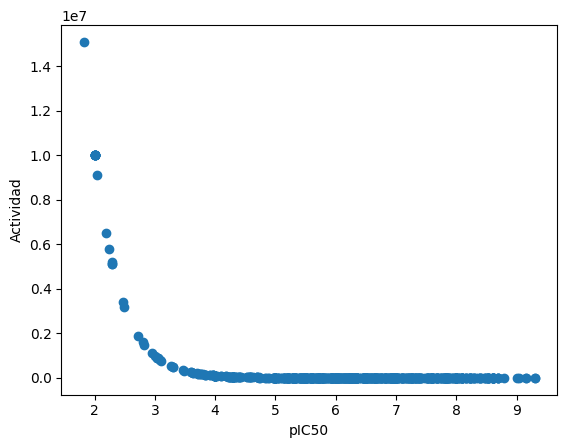

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
activities = []
pIC50s = []

# Buscar los datos de actividad de una proteína específica
for activity in client.activity.filter(target_chembl_id='CHEMBL6032').filter(standard_type="IC50"):
    i= pd.to_numeric(activity["standard_value"], errors="coerce") # Asegúrate de que los valores en la columna "standard_value" sean numéricos
    activities.append(i)
    pIC50s.append(-np.log10(i*10.0**-9.0))
# Generar un gráfico de dispersión de los datos de actividad
plt.scatter(pIC50s, activities)
plt.xlabel('pIC50')
plt.ylabel('Actividad')
plt.show()

In [ ]:
targets_api = new_client.target
compounds_api = new_client.molecule
bioactivities_api = new_client.activity
uniprot_id1 = "P04626"  #P04626 erbb2
uniprot_id2 = "P26358"  #P26358 dnmt1

targets_1 = targets_api.get(target_components__accession=uniprot_id1).only(
    "target_chembl_id", "organism", "pref_name", "target_type"
)
print(f'The type of the targets is "{type(targets_1)}"')

The type of the targets is "<class 'chembl_webresource_client.query_set.QuerySet'>"


In [ ]:
targets_1 = pd.DataFrame.from_records(targets_1)
targets_1

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,CHEMBL1824,SINGLE PROTEIN
1,Homo sapiens,Receptor protein-tyrosine kinase erbB-2,CHEMBL1824,SINGLE PROTEIN
2,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,CHEMBL2111431,PROTEIN FAMILY
3,Homo sapiens,Epidermal growth factor receptor,CHEMBL2363049,PROTEIN FAMILY
4,Homo sapiens,FASN/HER2,CHEMBL4106134,PROTEIN COMPLEX
5,Homo sapiens,ErbB-2/ErbB-3 heterodimer,CHEMBL4630723,PROTEIN COMPLEX


In [ ]:
target_one = targets_1.iloc[0]
target_one

organism                                       Homo sapiens
pref_name           Receptor protein-tyrosine kinase erbB-2
target_chembl_id                                 CHEMBL1824
target_type                                  SINGLE PROTEIN
Name: 0, dtype: object

In [ ]:
chembl_id1= target_one.target_chembl_id
print(f"The target ChEMBL ID is {chembl_id1}")   # ID de Diana seleccionada

The target ChEMBL ID is CHEMBL1824


In [ ]:
bioactivities1 = bioactivities_api.filter(
    target_chembl_id=chembl_id1, type="IC50", relation="=", assay_type="B"
).only(
    "activity_id",
    "pref_name",
    "assay_chembl_id",
    "assay_description",
    "assay_type",
    "molecule_chembl_id",
    "type",
    "standard_units",
    "relation",
    "standard_value",
    "target_chembl_id",
    "target_organism",)

print(f"Length and type of bioactivities object: {len(bioactivities1)}, {type(bioactivities1)}")

Length and type of bioactivities object: 2153, <class 'chembl_webresource_client.query_set.QuerySet'>


In [ ]:
print(f"Length and type of first element: {len(bioactivities1[0])}, {type(bioactivities1[0])}")
bioactivities1[0]

Length and type of first element: 13, <class 'dict'>


{'activity_id': 107994,
 'assay_chembl_id': 'CHEMBL676069',
 'assay_description': 'Inhibition of heregulin-stimulated autophosphorylation of erbB2 in MDA-MB 453 cells',
 'assay_type': 'B',
 'molecule_chembl_id': 'CHEMBL136058',
 'relation': '=',
 'standard_units': 'nM',
 'standard_value': '5.0',
 'target_chembl_id': 'CHEMBL1824',
 'target_organism': 'Homo sapiens',
 'type': 'IC50',
 'units': 'nM',
 'value': '5.0'}

In [ ]:
bioactivities_df1 = pd.DataFrame.from_records(bioactivities1)
print(f"DataFrame shape: {bioactivities_df1.shape}")
bioactivities_df1.head(3)

DataFrame shape: (2154, 13)


,activity_id,assay_chembl_id,assay_description,assay_type,molecule_chembl_id,relation,standard_units,standard_value,target_chembl_id,target_organism,type,units,value
0,107994,CHEMBL676069,Inhibition of heregulin-stimulated autophospho...,B,CHEMBL136058,=,nM,5.0,CHEMBL1824,Homo sapiens,IC50,nM,5.0
1,107994,CHEMBL676069,Inhibition of heregulin-stimulated autophospho...,B,CHEMBL136058,=,nM,5.0,CHEMBL1824,Homo sapiens,IC50,nM,5.0
2,110483,CHEMBL676069,Inhibition of heregulin-stimulated autophospho...,B,CHEMBL545315,=,nM,9.0,CHEMBL1824,Homo sapiens,IC50,nM,9.0


In [ ]:
bioactivities_df1["units"].unique()

array(['nM', 'uM', 'M', 'ug ml-1', "10'-6g/ml", "10'-6M", "10'-7M",
       '10^-8M', 'nmol'], dtype=object)

In [ ]:
bioactivities_df1.dtypes

activity_id            int64
assay_chembl_id       object
assay_description     object
assay_type            object
molecule_chembl_id    object
relation              object
standard_units        object
standard_value        object
target_chembl_id      object
target_organism       object
type                  object
units                 object
value                 object
dtype: object

In [ ]:
bioactivities_df1 = bioactivities_df1.astype({"standard_value": "float64"})
bioactivities_df1.dtypes

activity_id             int64
assay_chembl_id        object
assay_description      object
assay_type             object
molecule_chembl_id     object
relation               object
standard_units         object
standard_value        float64
target_chembl_id       object
target_organism        object
type                   object
units                  object
value                  object
dtype: object

In [ ]:
bioactivities_df1.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {bioactivities_df1.shape}")

DataFrame shape: (2154, 13)


In [ ]:
print(f"Units in downloaded data: {bioactivities_df1['standard_units'].unique()}")
print(
    f"Number of non-nM entries:\
    {bioactivities_df1[bioactivities_df1['standard_units'] != 'nM'].shape[0]}"
)

Units in downloaded data: ['nM' 'ug.mL-1']
Number of non-nM entries:    27


In [ ]:
bioactivities_df1 = bioactivities_df1[bioactivities_df1["standard_units"] == "nM"]
print(f"Units after filtering: {bioactivities_df1['standard_units'].unique()}")

Units after filtering: ['nM']


In [ ]:
bioactivities_df1.drop_duplicates("molecule_chembl_id", keep="first", inplace=True)
print(f"DataFrame shape: {bioactivities_df1.shape}")

DataFrame shape: (1822, 13)


# **Referencias y otras ligas de interés:**
1. [Servidor web de ChEMBL](https://www.ebi.ac.uk/chembl/)
2. [Esquema de ChEMBL](https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/chembl_33_schema.png)
3. [Adquisición de datos de ChEMBL de TeachOpenCADD(consultarlo para mayor información)](https://projects.volkamerlab.org/teachopencadd/talktorials/T001_query_chembl.html)
4. [Script de obtención de información de ChEMBL por Leela S. Dodda](https://gist.github.com/leelasd/746f3c447805fc6ea5aad1071bd77aef)
5. [Documentación de la API de ChEMBL](https://www.ebi.ac.uk/chembl/api/utils/docs)
6. [Otros ejemplos del uso de la API](https://github.com/chembl/notebooks/blob/main/ChEMBL_API_example_for_webinar.ipynb)
